In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


In [2]:
!kaggle datasets download -d jackywang529/toronto-bikeshare-data

 94% 55.0M/58.4M [00:00<00:00, 87.8MB/s]
100% 58.4M/58.4M [00:00<00:00, 108MB/s] 


In [3]:
!unzip toronto-bikeshare-data.zip

Archive:  toronto-bikeshare-data.zip
  inflating: bikeshare-ridership-2017/2017 Data/Bikeshare Ridership (2017 Q1).csv  
  inflating: bikeshare-ridership-2017/2017 Data/Bikeshare Ridership (2017 Q2).csv  
  inflating: bikeshare-ridership-2017/2017 Data/Bikeshare Ridership (2017 Q3).csv  
  inflating: bikeshare-ridership-2017/2017 Data/Bikeshare Ridership (2017 Q4).csv  
  inflating: bikeshare-ridership-2017/2017 Data/~$ke Share Toronto Ridership_Approval to Publish Form.docx  
  inflating: bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q1 2018.csv  
  inflating: bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q2 2018.csv  
  inflating: bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q3 2018.csv  
  inflating: bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q4 2018.csv  


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('/content/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q1 2018.csv')
df.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member
3,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),1/1/2018 1:16,7020,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,1/1/2018 1:12,7060,Princess St / Adelaide St E,Annual Member


In [9]:
df.shape

(178559, 9)

In [10]:
# check null
df.isnull().sum()

trip_id                  0
trip_duration_seconds    0
from_station_id          0
trip_start_time          0
from_station_name        0
trip_stop_time           0
to_station_id            0
to_station_name          0
user_type                0
dtype: int64

In [40]:
df.loc[df['from_station_name'] == df['to_station_name'],'isBack'] = 'return'
df.loc[df['from_station_name'] != df['to_station_name'],'isBack'] = 'no'

In [45]:
returning = df.groupby('isBack').agg('count')
returning

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
isBack,,,,,,,,,
no,176260,176260,176260,176260,176260,176260,176260,176260,176260
return,2299,2299,2299,2299,2299,2299,2299,2299,2299


In [46]:
type_labels = returning.trip_id.sort_values().index 
type_counts = returning.trip_id.sort_values()

In [49]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np


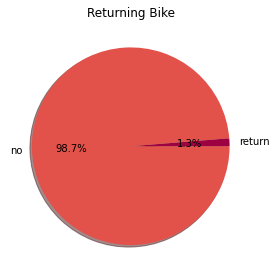

In [53]:
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Returning Bike')
type_show_ids = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()